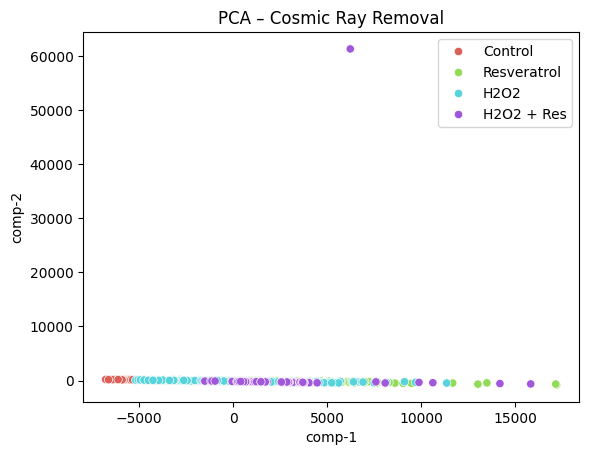

In [1]:
#PCA 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

#read the data
data = pd.read_excel('C:/Users/perki/OneDrive/Desktop/Machine Learning Demo/Combined - No Processing.xlsx')


X_features = data.iloc[:, 1:1301]
y_label = data.iloc[:,0]


#convert the features into the 2 top features
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_features)
#principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
#principalDf.head(5)
#data[['group']].head()
#finalDf = pd.concat([principalDf, data[['group']]], axis = 1)

df = pd.DataFrame()
df["y"] = y_label
df["comp-1"] = principalComponents[:,0]
df["comp-2"] = principalComponents[:,1]

scatter_plot = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 4),
                data=df).set(title="PCA – Cosmic Ray Removal") 
 
#plt.savefig('PCA – No Processing.png')


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 655 samples in 0.008s...
[t-SNE] Computed neighbors for 655 samples in 0.309s...
[t-SNE] Computed conditional probabilities for sample 655 / 655
[t-SNE] Mean sigma: 434.685931
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.192703
[t-SNE] KL divergence after 1000 iterations: 0.329145


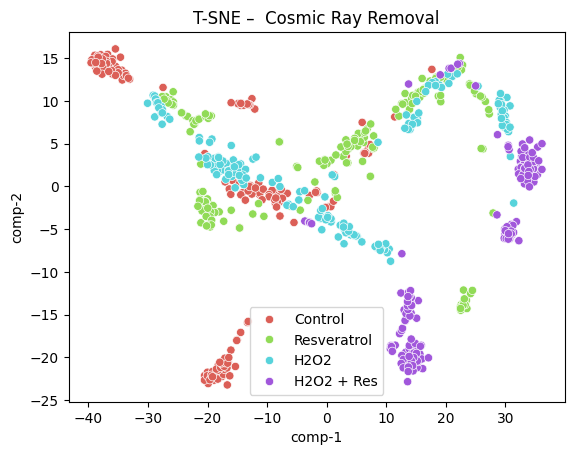

In [2]:
#t-SNE
from sklearn.manifold import TSNE
from numpy import reshape
import seaborn as sns

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(X_features)

df = pd.DataFrame()
df["y"] = y_label
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

scatter_plot = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 4),
                data=df).set(title="T-SNE –  Cosmic Ray Removal") 


Calculating PHATE...
  Running PHATE on 655 observations and 1300 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.11 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.14 seconds.
    Calculating affinities...
    Calculated affinities in 0.07 seconds.
  Calculated graph and diffusion operator in 0.34 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.05 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.42 seconds.
Calculated PHATE in 0.83 seconds.
Note: you may need to restart the kernel to use updated packages.


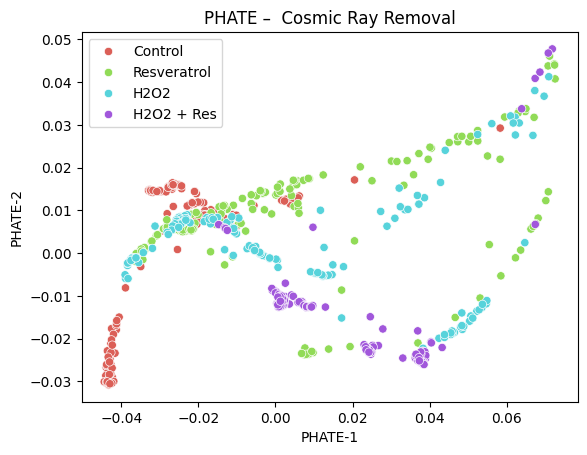

In [3]:
#phate
import phate

phate_op = phate.PHATE()
phate_op.set_params(knn=10, decay=15, t=12)#knn : Number of nearest neighbors (default: 5). 
#Increase this (e.g. to 20) if your PHATE embedding appears very disconnected. 
#You should also consider increasing knn if your dataset is extremely large (e.g. >100k cells)
#decay : Alpha decay (default: 15). Decreasing decay increases connectivity on the graph,
#increasing decay decreases connectivity. 
#This rarely needs to be tuned. Set it to None for a k-nearest neighbors kernel.
data_phate = phate_op.fit_transform(X_features)

result_phate = pd.DataFrame()
result_phate["y"] = y_label
result_phate["PHATE-1"] = data_phate[:,0]
result_phate["PHATE-2"] = data_phate[:,1]

sns.scatterplot(x="PHATE-1", y="PHATE-2", hue=result_phate.y.tolist(),
                palette=sns.color_palette("hls", 4),
                data=result_phate).set(title="PHATE –  Cosmic Ray Removal") 

plt.savefig('PHATE – No Processing.png')
%pip install phate
